<a href="https://colab.research.google.com/github/Hinni79/deeplearningbook/blob/master/DLBook_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekt 1: Lineare Regression
## Schritt 1: Datengenerierung und Visualisierung

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(1)
my_weight = 4

In [0]:
# Array mit 100 Werten generieren
input = np.arange(0,10,0.1)
noise = np.random.randint(low=1, high=10, size=input.shape)
output = my_weight * input + noise

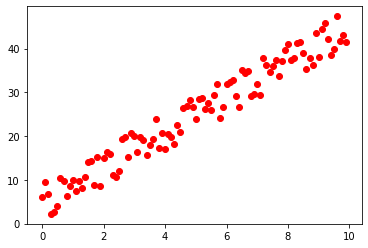

In [16]:
plt.scatter(input, output, c="red")
plt.show()

## Schritt 2: Modell erstellen
X wird mit w multipliziert und b addiert

In [0]:
def linear_regression_model(X, w, b):
    return tf.add(tf.multiply(X, w), b)

# Platzhalter für X und Y erstellen
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")
# Variablen für w und b erstellen
w = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="bias")

In [0]:
# Cost function
cost = tf.square(Y - linear_regression_model(X, w, b))
train_op = tf.train.GradientDescentOptimizer(0.005).minimize(cost)

## Schritt 3: Modell trainieren
For-Schleife über die Anzahl der Epochen, die Trainingsoperation ausführen mit den Trainingswerten. Anschliessend Gewichte und Bias auswerten.

--- Epoch 0 ---
bias_value: 2.5111746788024902
weight_value: 3.95035982131958
--- Epoch 1 ---
bias_value: 2.956328868865967
weight_value: 3.9053900241851807
--- Epoch 2 ---
bias_value: 3.340810537338257
weight_value: 3.866549491882324
--- Epoch 3 ---
bias_value: 3.6728878021240234
weight_value: 3.833002805709839
--- Epoch 4 ---
bias_value: 3.959704637527466
weight_value: 3.804028034210205
--- Epoch 5 ---
bias_value: 4.207431793212891
weight_value: 3.7790026664733887
--- Epoch 6 ---
bias_value: 4.4213948249816895
weight_value: 3.7573883533477783
--- Epoch 7 ---
bias_value: 4.606190204620361
weight_value: 3.738720178604126
--- Epoch 8 ---
bias_value: 4.765801906585693
weight_value: 3.722595691680908
--- Epoch 9 ---
bias_value: 4.903655529022217
weight_value: 3.708669424057007
--- Epoch 10 ---
bias_value: 5.022720813751221
weight_value: 3.696641445159912
--- Epoch 11 ---
bias_value: 5.125558376312256
weight_value: 3.6862528324127197
--- Epoch 12 ---
bias_value: 5.21437931060791
weight_val

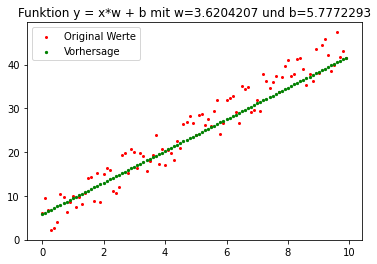

In [19]:
epochs = range(0,200)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in epochs:
        print("--- Epoch {} ---".format(i))
        for (x,y) in zip(input,output):
            sess.run(train_op, feed_dict={X:x, Y:y})
        
        weight_value = sess.run(w)
        bias_value = sess.run(b)

        print("bias_value: {}".format(bias_value))
        print("weight_value: {}".format(weight_value))

    input = np.arange(0, 10, 0.1)
    predicted_output = sess.run(linear_regression_model(input, weight_value, bias_value))
    plt.title('Funktion')
    plt.scatter(input, output, c="red", s=4, label="Original Werte")
    plt.scatter(input, predicted_output, c="g", s=5, label="Vorhersage")
    plt.legend(loc='upper left')
    plt.title('Funktion y = x*w + b mit w='+str(weight_value)+' und b='+str(bias_value))

## Schritt 4 Modell benutzen und Ergebnisse visualisieren


In [7]:
input = np.arange(0, 10, 0.1)
predicted_output = sess.run(linear_regression_model(input, weight_value, bias_value))
plt.title('Funktion')
plt.scatter(input, output, c="red", s=4, label="Original Werte")
plt.scatter(input, predicted_output, c="g", s=5, label="Vorhersage")
plt.legend(loc='upper left')
plt.title('Funktion y = x*w + b mit w='+str(weight_value)+' und b='+str(bias_value))

RuntimeError: ignored